# 1d acoustic wave on a string test case

This notebook documents the process of developing a 1d string system with motion governed by the acoustic wave equation. We will use a pair of homogeneous Dirichlet boundary conditions as well as initial conditions for the position and velocity. The system is set up as follows:

$$
\frac{\partial^2 u(x,t)}{\partial t^2} = c^2 \frac{\partial^2 u(x,t)}{\partial x^2}, \quad x \in [-L, L], \, t > 0
$$

**Boundary conditions:**

$$
u(-L, t) = 0, \quad u(L, t) = 0
$$

**Initial conditions:**

$$
u(x, 0) = \sin(\frac{2 \pi  x}{L}), \quad u_{t}(x, 0) = 0
$$




In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

### Wave equation analytical solution 

Solving the system above leads to the following solution: 

$$ u(x, t) = \cos(\frac{2 \pi c t}{L}) \sin(\frac{2 \pi x}{L}) $$

Below we plot the initial position of the wave alongside the solution at different time steps, we take $c$ as 1000 m/s leading to a period of 1 second for a length $L$ = 1000m

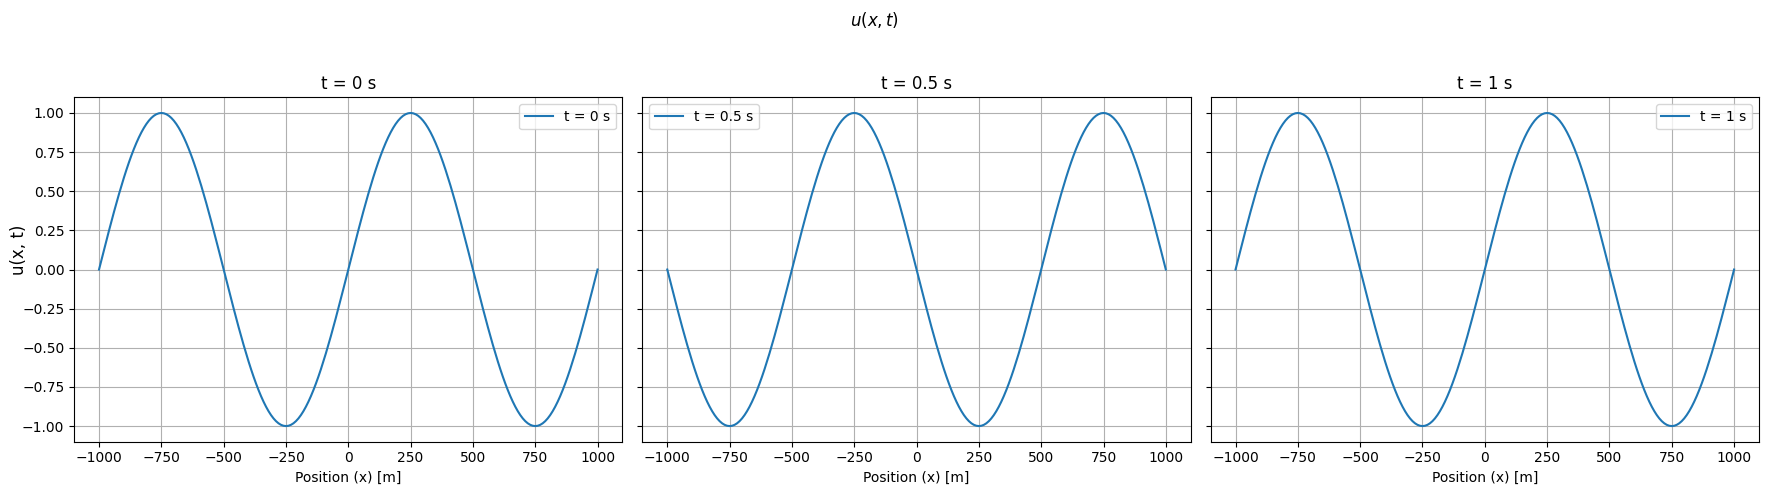

In [2]:
# define constants 
L = 1000
c = 1000
t_values = [0, 0.5, 1]
x = np.linspace(-L, L, 201)

# define analytical solution 
def u(x, t, c, L):
    return np.cos(2*np.pi*c*t/L)*np.sin(2*np.pi*x/L)

# set up the figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# plot the wave solution at each specified time step in side-by-side subplots
for i, t in enumerate(t_values):
    axs[i].plot(x, u(x, t, c, L), label=f"t = {t} s")
    axs[i].set_xlabel("Position (x) [m]")
    axs[i].set_title(f"t = {t} s")
    axs[i].legend()
    axs[i].grid(True)

# set the y-axis label for the entire figure
fig.supylabel("u(x, t)")
fig.suptitle("$u(x, t)$")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Solving the equation numerically with a finite difference method

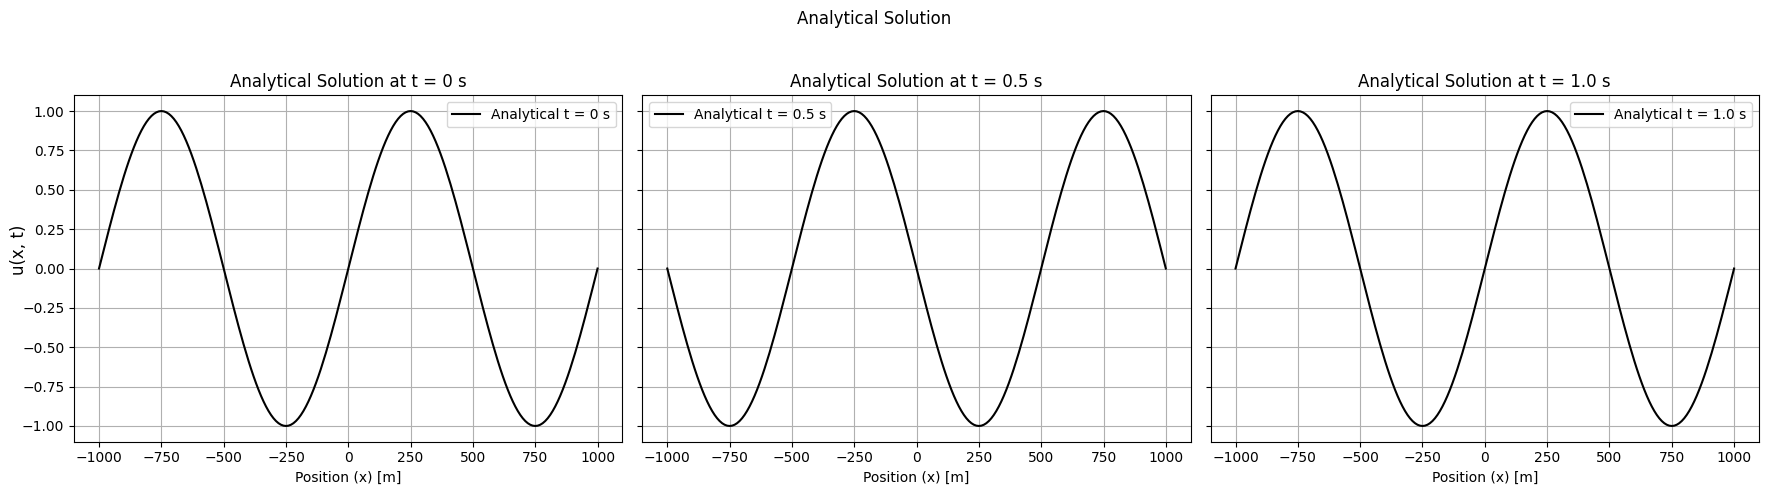

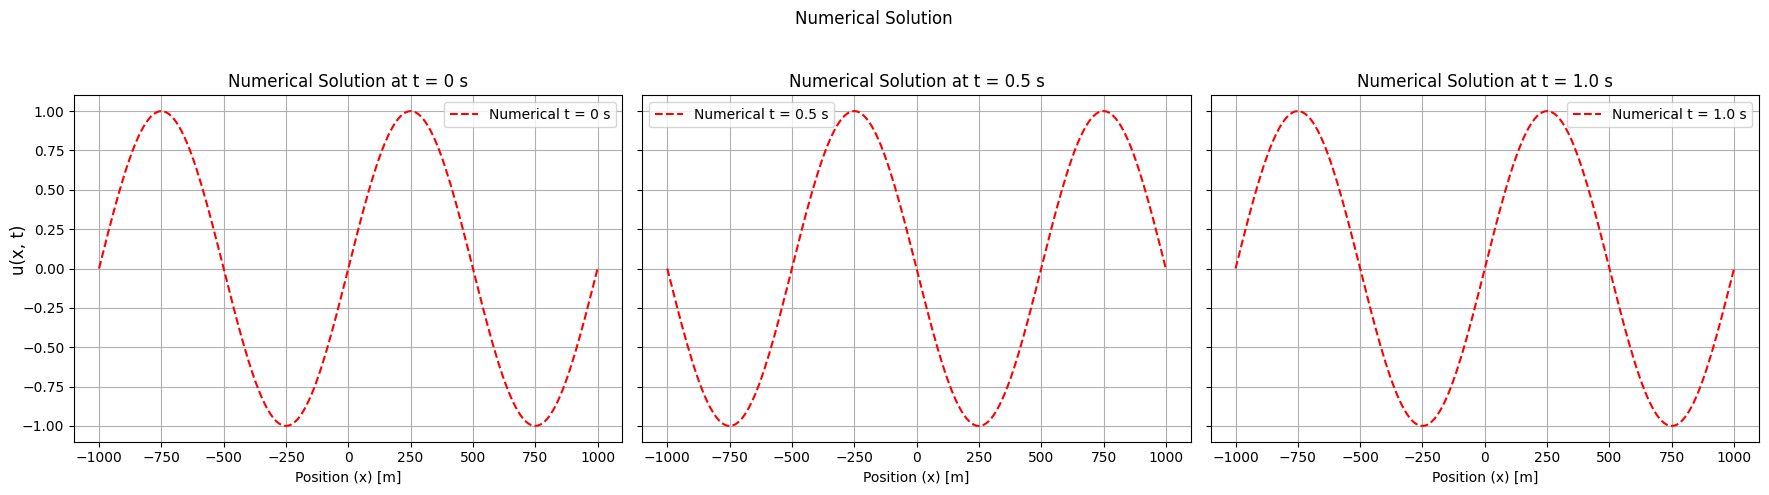

In [ ]:
# Constants
L = 1000                 # Half-length of the domain in meters
c = 1000                 # Wave speed in m/s
N = 201                  # Number of spatial points
dx = 2 * L / (N - 1)     # Spatial step size for [-L, L] domain
dt = 0.9 * dx / c        # Time step size (CFL condition)
T = 1.0                  # Total simulation time in seconds
x = np.linspace(-L, L, N) # Spatial grid

# Total time steps
Nt = int(T / dt) + 1

# Initialize the wave field
u = np.sin(2 * np.pi * x / L)        # Initial condition u(x, 0)
u_prev = u.copy()                    # Initial velocity is zero: u_t(x, 0) = 0, so u at t=-1 = u at t=0
u_next = np.zeros(N)                 # Placeholder for the next time step

# Storage for specific time indices based on dt intervals
# Store the solutions at integer time indices corresponding to t = 0, 0.5, and 1.0 seconds
time_steps = [0, int(0.5 / dt), int(1.0 / dt)]
u_num_at_t = {}

# Main time evolution loop
for n in range(Nt):
    # Store the results for specific time indices
    if n in time_steps:
        u_num_at_t[n] = u.copy()  # Store the wave profile at the specified time step indices
    
    # Compute the next time step using finite difference
    for i in range(1, N - 1):
        u_next[i] = (2 * u[i] - u_prev[i] +
                     (c * dt / dx) ** 2 * (u[i + 1] - 2 * u[i] + u[i - 1]))

    # Apply boundary conditions
    u_next[0] = u_next[-1] = 0

    # Update arrays for the next time step
    u_prev = u.copy()
    u = u_next.copy()

# Analytical Solution
def analytical_solution(x, t, c, L):
    return np.cos(2 * np.pi * c * t / L) * np.sin(2 * np.pi * x / L)

## Plotting the analytical solution
fig1, axs1 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, t in enumerate([0, 0.5, 1.0]):
    # Analytical solution at time t
    u_analytic = analytical_solution(x, t, c, L)
    axs1[i].plot(x, u_analytic, 'k-', label=f"Analytical t = {t} s")

    # Plot formatting
    axs1[i].set_xlabel("Position (x) [m]")
    axs1[i].set_title(f"Analytical Solution at t = {t} s")
    axs1[i].legend()
    axs1[i].grid(True)

# Set global y-axis label
fig1.supylabel("u(x, t)")
fig1.suptitle("Analytical Solution")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Plotting the numerical solution
fig2, axs2 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# Map the specified times to the stored integer time indices
time_map = {0: 0, 0.5: int(0.5 / dt), 1.0: int(1.0 / dt)}

for i, t in enumerate([0, 0.5, 1.0]):
    # Retrieve the numerical solution for the mapped time index
    u_num = u_num_at_t[time_map[t]]
    axs2[i].plot(x, u_num, 'r--', label=f"Numerical t = {t} s")

    # Plot formatting
    axs2[i].set_xlabel("Position (x) [m]")
    axs2[i].set_title(f"Numerical Solution at t = {t} s")
    axs2[i].legend()
    axs2[i].grid(True)

# Set global y-axis label
fig2.supylabel("u(x, t)")
fig2.suptitle("Numerical Solution")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


### Testing the accuracy of the numerical solver above

In [4]:
# Define tolerances
rtol = 1e-4
atol = 1e-5

# Times to check
times_to_check = [0, 0.5, 1.0]
time_map = {0: 0, 0.5: int(0.5 / dt), 1.0: int(1.0 / dt)}

# Check if numerical and analytical solutions match and report differences
for t in times_to_check:
    # Numerical and analytical solutions at this time step
    u_num = u_num_at_t[time_map[t]]
    u_analytic = analytical_solution(x, t, c, L)
    
    # Check if they are close
    is_close = np.all(np.isclose(u_num, u_analytic, rtol=rtol, atol=atol))
    
    if not is_close:
        # Calculate different error metrics
        max_abs_error = np.max(np.abs(u_num - u_analytic))
        mean_abs_error = np.mean(np.abs(u_num - u_analytic))
        rmse = np.sqrt(np.mean((u_num - u_analytic) ** 2))
        relative_error = np.mean(np.abs((u_num - u_analytic) / (u_analytic + 1e-10))) * 100  # avoid division by zero
        
        print(f"At t = {t} s:")
        print(f"  - Max Absolute Error: {max_abs_error:.6f}")
        print(f"  - Mean Absolute Error (MAE): {mean_abs_error:.6f}")
        print(f"  - Root Mean Squared Error (RMSE): {rmse:.6f}")
        print(f"  - Average Relative Error: {relative_error:.2f}%")
    else:
        print(f"At t = {t} s: Numerical and analytical solutions are within tolerance.")


At t = 0 s: Numerical and analytical solutions are within tolerance.
At t = 0.5 s:
  - Max Absolute Error: 0.000395
  - Mean Absolute Error (MAE): 0.000250
  - Root Mean Squared Error (RMSE): 0.000278
  - Average Relative Error: 0.04%
At t = 1.0 s:
  - Max Absolute Error: 0.000162
  - Mean Absolute Error (MAE): 0.000103
  - Root Mean Squared Error (RMSE): 0.000114
  - Average Relative Error: 0.02%


### Solving analytically and numerically for $u_{t}(x, t) \neq 0$

The analytical solution for the case $u_t(x, t) = \frac{2x}{L}$ is given by:

$$ u(x, t) = \sin(\frac{2 \pi x}{L}) \cos(\frac{2 \pi c t}{L}) + \sum_{n=1}^{\infty} \frac{4 (-1)^{n+1}}{n^2 \pi c} \sin(\frac{n \pi x}{L}) \sin(\frac{n \pi c t}{L}) $$

Below we implement this for $L$ = 1000m, $c$ = 1000m/s and $n$ = 50

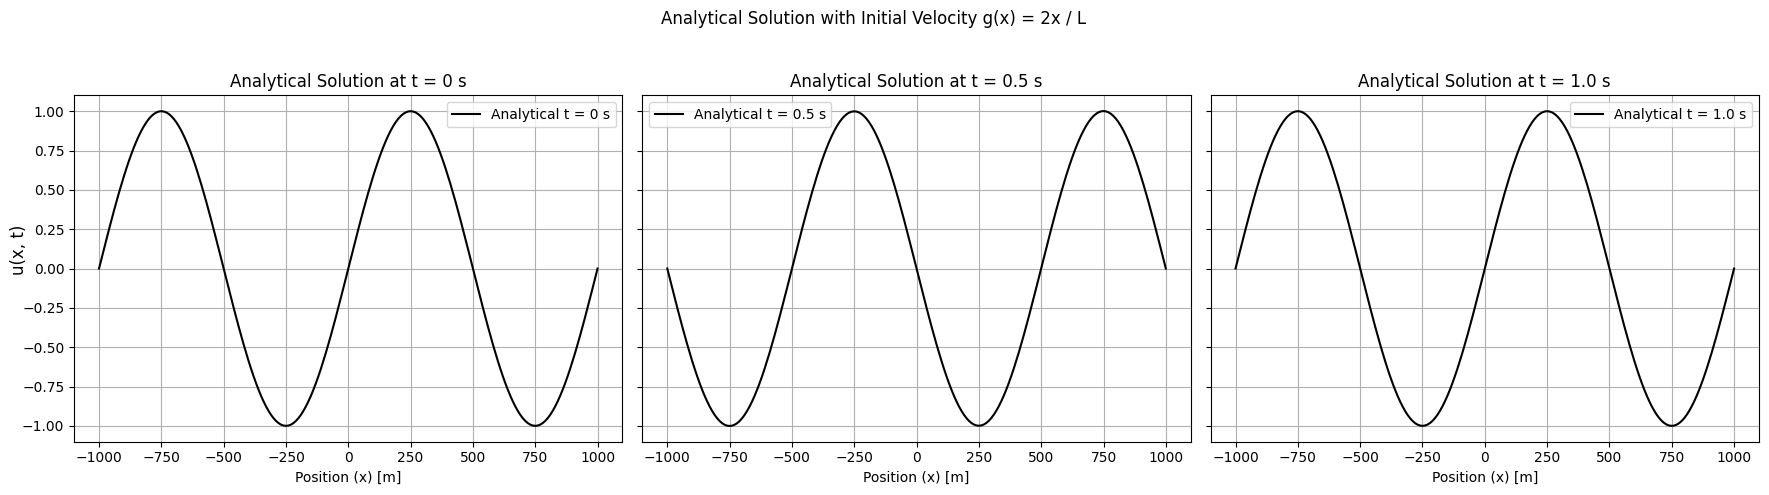

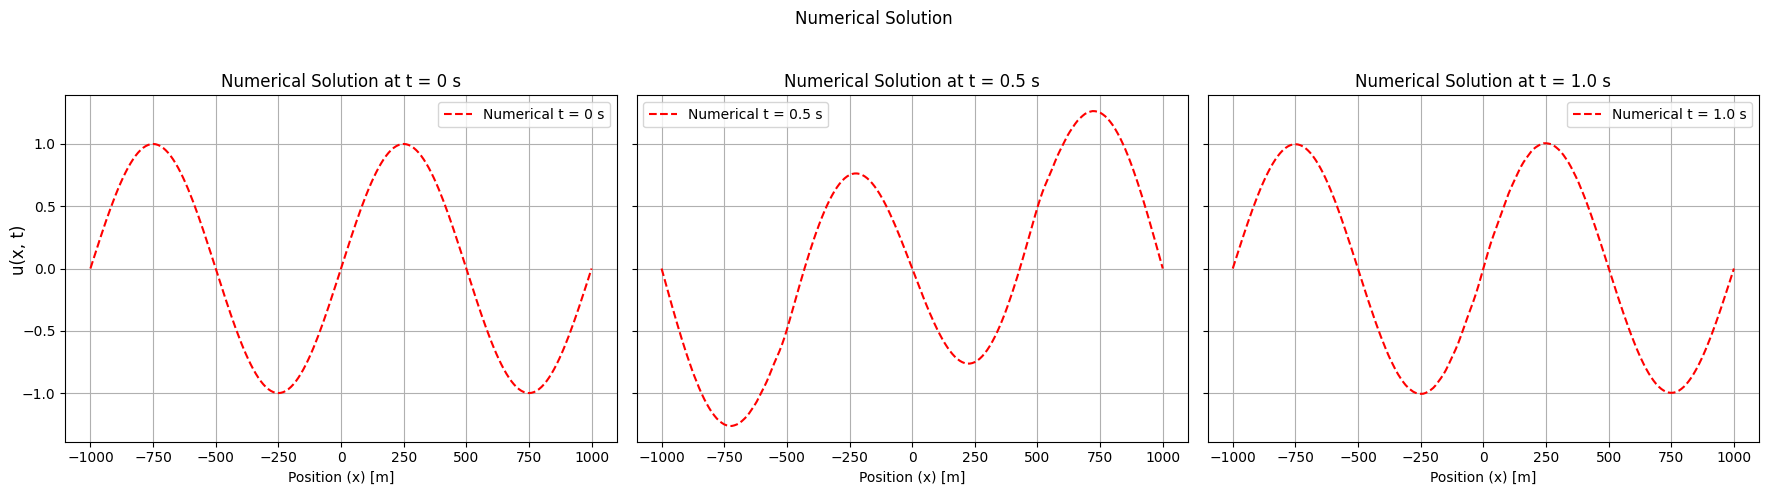

In [ ]:
# can get rid of this section

# Constants
L = 1000                 # Half-length of the domain in meters
c = 1000                 # Wave speed in m/s
N = 201                  # Number of spatial points
dx = 2 * L / (N - 1)     # Spatial step size for [-L, L] domain
dt = 0.6 * dx / c        # Time step size (CFL condition)
T = 1.0                  # Total simulation time in seconds
x = np.linspace(-L, L, N) # Spatial grid

# Total time steps
Nt = int(T / dt) + 1

# Initialize the wave field
u = np.sin(2 * np.pi * x / L)        # Initial condition u(x, 0)
u_prev = u - dt * (2 * x / L)        # Initial velocity g(x) = 2x / L
u_next = np.zeros(N)                 # Placeholder for the next time step

# Storage for specific time indices based on dt intervals
# Store the solutions at integer time indices corresponding to t = 0, 0.5, and 1.0 seconds
time_steps = [0, int(0.5 / dt), int(1.0 / dt)]
u_num_at_t = {}

# Main time evolution loop
for n in range(Nt):
    # Store the results for specific time indices
    if n in time_steps:
        u_num_at_t[n] = u.copy()  # Store the wave profile at the specified time step indices
    
    # Compute the next time step using finite difference
    for i in range(1, N - 1):
        u_next[i] = (2 * u[i] - u_prev[i] +
                     (c * dt / dx) ** 2 * (u[i + 1] - 2 * u[i] + u[i - 1]))

    # Apply boundary conditions
    u_next[0] = u_next[-1] = 0

    # Update arrays for the next time step
    u_prev = u.copy()
    u = u_next.copy()

# Analytical Solution using the modified function for initial velocity g(x) = 2x / L
def analytical_solution_with_velocity(x, t, c, L, num_terms=50):
    """
    Compute the analytical solution u(x, t) with initial displacement sin(2 * pi * x / L) and
    initial velocity g(x) = 2x / L.
    """
    # Initial displacement term: only n=2 term contributes
    u_analytic = np.sin(2 * np.pi * x / L) * np.cos(2 * np.pi * c * t / L)
    
    # Sum Fourier series terms for the initial velocity condition
    for n in range(1, num_terms + 1):
        bn = 4 * (-1)**(n + 1) / (n**2 * np.pi * c)  # Fourier coefficient for velocity
        u_analytic += bn * np.sin(n * np.pi * x / L) * np.sin(n * np.pi * c * t / L)
    
    return u_analytic

# Plotting the analytical solution
fig1, axs1 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, t in enumerate([0, 0.5, 1.0]):
    # Analytical solution at time t
    u_analytic = analytical_solution_with_velocity(x, t, c, L)
    axs1[i].plot(x, u_analytic, 'k-', label=f"Analytical t = {t} s")

    # Plot formatting
    axs1[i].set_xlabel("Position (x) [m]")
    axs1[i].set_title(f"Analytical Solution at t = {t} s")
    axs1[i].legend()
    axs1[i].grid(True)

# Set global y-axis label
fig1.supylabel("u(x, t)")
fig1.suptitle("Analytical Solution with Initial Velocity g(x) = 2x / L")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Plotting the numerical solution
fig2, axs2 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# Map the specified times to the stored integer time indices
time_map = {0: 0, 0.5: int(0.5 / dt), 1.0: int(1.0 / dt)}

for i, t in enumerate([0, 0.5, 1.0]):
    # Retrieve the numerical solution for the mapped time index
    u_num = u_num_at_t[time_map[t]]
    axs2[i].plot(x, u_num, 'r--', label=f"Numerical t = {t} s")

    # Plot formatting
    axs2[i].set_xlabel("Position (x) [m]")
    axs2[i].set_title(f"Numerical Solution at t = {t} s")
    axs2[i].legend()
    axs2[i].grid(True)

# Set global y-axis label
fig2.supylabel("u(x, t)")
fig2.suptitle("Numerical Solution")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
